In [1]:
import pandas as pd
import os

In [2]:
import pathlib

# define the path
currentDirectory = pathlib.Path('.')

# define the pattern
currentPattern = 'FEYE'

for currentFile in currentDirectory.glob(currentPattern):
    print(currentFile)

FEYE


In [3]:
#company = 'CHKP'
filename = 'RealDenominador' + str(currentFile) + '.csv'

print(currentFile/filename)

FEYE\RealDenominadorFEYE.csv


In [4]:
df = pd.read_csv(currentFile/filename)
df[ 'DATES' ] = pd.to_datetime(df['DATES'])
df.head()

,DATES,D Revenue,U CR,D OE,D NOI,U CAPEX,U WK,D FCF
0,2017-03-31,35413.051543,6626.901060,49587.501459,1769.566048,7485.421778,215978.231865,20634.579108
1,2017-06-30,32423.941177,5696.998180,43225.640783,1882.853339,7665.921601,217100.380061,21129.726015
2,2017-09-30,34194.149566,3149.147548,30944.118006,1507.859726,3958.645092,220701.820385,23423.388086
3,2017-12-31,28356.553369,3066.601392,16698.976290,1610.966252,3757.802882,214603.831795,25285.729822
4,2018-03-31,25489.686412,2927.163551,11643.127444,1718.528935,3704.055377,214603.831795,19983.035926


In [5]:
df1 = df.set_index('DATES').resample('1w').mean()
df1

,D Revenue,U CR,D OE,D NOI,U CAPEX,U WK,D FCF
DATES,,,,,,,
2017-04-02,35413.051543,6626.901060,49587.501459,1769.566048,7485.421778,215978.231865,20634.579108
2017-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#df1[df1['D REVENUE'].isna()]

In [7]:
#df1['Revenue'].interpolate('linear').plot()
#pd.DataFrame(df['Revenue'], index=df['Date']).interpolate(method='time')

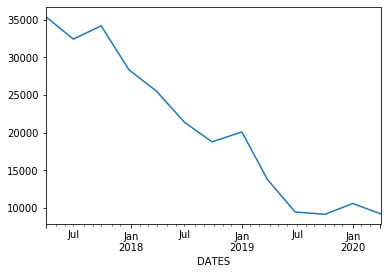

In [8]:
df1['D Revenue'].interpolate('linear').plot()

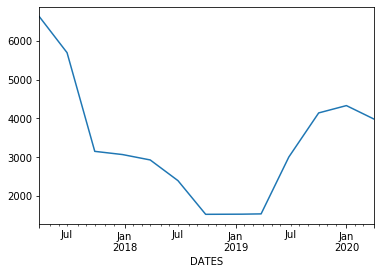

In [9]:
df1['U CR'].interpolate('linear').plot()

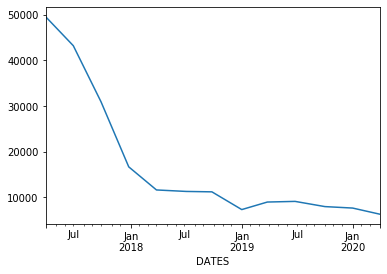

In [10]:
df1['D OE'].interpolate('linear').plot()

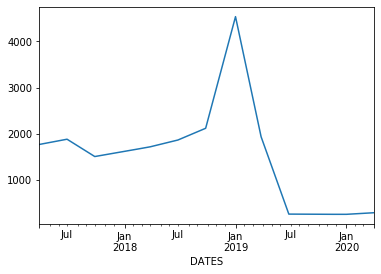

In [11]:
df1['U NOI'].interpolate('linear').plot()

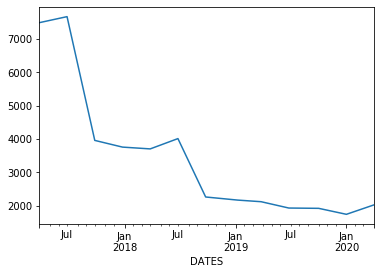

In [12]:
df1['U CAPEX'].interpolate('linear').plot()

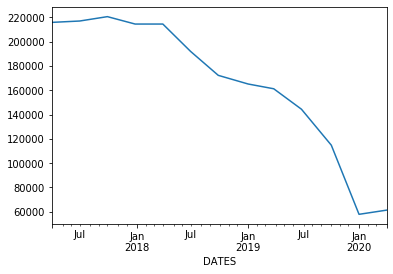

In [13]:
df1['U WK'].interpolate('linear').plot()

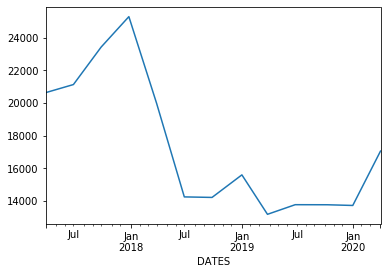

In [14]:
df1['D FCF'].interpolate('linear').plot()

In [15]:
df1['D Revenue'] = df1['D Revenue'].interpolate('linear')
df1['U CR'] = df1['U CR'].interpolate('linear')
df1['D OE'] = df1['D OE'].interpolate('linear')
df1['U NOI'] = df1['U NOI'].interpolate('linear')
df1['U CAPEX'] = df1['U CAPEX'].interpolate('linear')
df1['U WK'] = df1['U WK'].interpolate('linear')
df1['D FCF'] = df1['D FCF'].interpolate('linear')

In [16]:
df1.info

<bound method DataFrame.info of                D Revenue         U CR          D OE        D NOI      U CAPEX  \
DATES                                                                           
2017-04-02  35413.051543  6626.901060  49587.501459  1769.566048  7485.421778   
2017-04-09  35183.119976  6555.370069  49098.127561  1778.280455  7499.306380   
2017-04-16  34953.188410  6483.839078  48608.753663  1786.994862  7513.190982   
2017-04-23  34723.256843  6412.308088  48119.379765  1795.709269  7527.075584   
2017-04-30  34493.325276  6340.777097  47630.005867  1804.423676  7540.960185   
...                  ...          ...           ...          ...          ...   
2020-03-08   9620.404989  4088.445236   6729.489740   281.003844  1941.155711   
2020-03-15   9515.424109  4061.562333   6624.174258   283.662554  1963.022187   
2020-03-22   9410.443229  4034.679431   6518.858775   286.321264  1984.888664   
2020-03-29   9305.462349  4007.796529   6413.543293   288.979974  2006.755141

In [17]:
outfile = 'InterpolatedDenWeek' + str(currentFile) + '.csv'
currentFile/outfile

WindowsPath('FEYE/InterpolatedDenWeekFEYE.csv')

In [18]:
df1.to_csv(currentFile/outfile)
#df1.to_csv("InterpolatedDenWeekCHKP.csv")

In [19]:
den = pd.read_csv(currentFile/outfile)

In [20]:
den.info

<bound method DataFrame.info of           DATES     D Revenue         U CR          D OE        D NOI  \
0    2017-04-02  35413.051543  6626.901060  49587.501459  1769.566048   
1    2017-04-09  35183.119976  6555.370069  49098.127561  1778.280455   
2    2017-04-16  34953.188410  6483.839078  48608.753663  1786.994862   
3    2017-04-23  34723.256843  6412.308088  48119.379765  1795.709269   
4    2017-04-30  34493.325276  6340.777097  47630.005867  1804.423676   
..          ...           ...          ...           ...          ...   
153  2020-03-08   9620.404989  4088.445236   6729.489740   281.003844   
154  2020-03-15   9515.424109  4061.562333   6624.174258   283.662554   
155  2020-03-22   9410.443229  4034.679431   6518.858775   286.321264   
156  2020-03-29   9305.462349  4007.796529   6413.543293   288.979974   
157  2020-04-05   9200.481469  3980.913626   6308.227811   291.638684   

         U CAPEX           U WK         D FCF  
0    7485.421778  215978.231865  20634.5791